# Mixed deterministic and probabilistic design of experiments

In this example we build a mixed deterministic and probabilistic design of experiments in which levels are defined from the probabilistic distribution of the input random vector. More precisely, we show how to create an `Axial` design of experiments which points are updated so that they match the mean and variance of the distribution.

The example here is an axial design of experiments where levels are proportional to the standard deviation of each component of the random input vector, and centered on the mean vector of the random input vector.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

Define the underlying random vector. 

In [2]:
dim = 2
R = ot.CorrelationMatrix(dim)
distribution = ot.Normal([2.0, 3.0], [0.5, 2.0], R)
rv = ot.RandomVector(distribution)

Define the structure of the design of experiments. 

In [3]:
levels = [1.0, 2.0, 3.0]
experiment = ot.Axial(dim, levels)
sample = experiment.generate()

We scale the design proportionnally to the standard deviation of each component.

In [4]:
covariance = rv.getCovariance()
scaling = [m.sqrt(covariance[i, i]) for i in range(dim)]
print('scaling=', scaling)
sample *= scaling

scaling= [0.5, 2.0]


Translate the design at the mean point of the distribution. 

In [5]:
center = rv.getMean()
print('center=', center)
sample += center

center= [2,3]


Draw the design as well as the distribution iso-values.

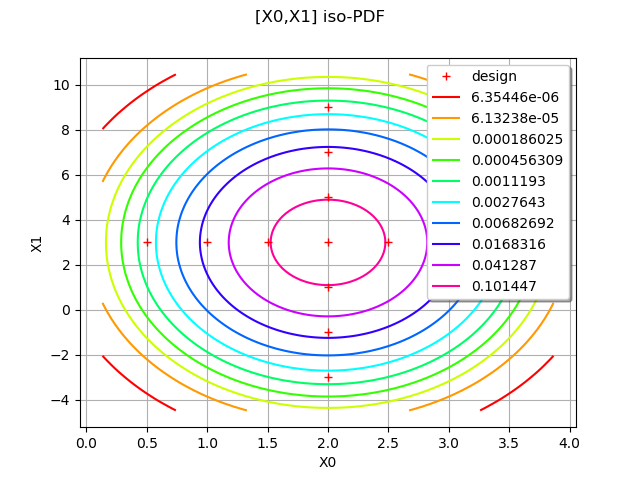

In [6]:
graph = distribution.drawPDF()
doe = ot.Cloud(sample)
doe.setColor('red')
doe.setLegend('design')
graph.add(doe)
graph